### The purpose of this notebook is to predict based on diagnostic measurements whether a patient has diabetes. Because the response variable is qualitative, this is a classification problem.

####   Importing pandas library

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

####    Reading the data into pandas frame

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=col_names)

####     Examine the data

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [9]:
data.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

####    The data type of all the features is correct we will not change it

In [10]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####    We can observe from the statistics that the maximum value of insulin is above 3 standard deviations that means there are outliers in the insulin column so we will remove the data which is 2 standard deviations above

In [11]:
data.loc[((data['insulin'] > 425))] = np.nan

In [12]:
data.isnull().sum()

pregnant    18
glucose     18
bp          18
skin        18
insulin     18
bmi         18
pedigree    18
age         18
label       18
dtype: int64

####   Since the dataset is small we can not drop the rows so, in this case we will use imputing method and replace the null value with mean

In [13]:
for f in ['pregnant', 
          'glucose', 
          'bp', 
          'skin',
          'insulin','bmi','pedigree','age','label']:
  data.loc[data[f].isnull(), f] = data[f].mean()

In [14]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

### Now our dataset is clean so we will start building the classification model

####  Prepare X and y in pandas

In [15]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols]
y = data.label

####   Split the dataset in training and test datset. Assign random sate variable in order to get same training and test dataset everytime

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

####   Fit a logistic regression model

In [18]:
logreg.fit(X_train, y_train.astype(int))

c:\users\sayaligirish\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

####  The regression coefficients and intercept

In [19]:
print(logreg.intercept_)
print(logreg.coef_)

[-5.54853439]
[[ 1.19820679e-01  2.92164097e-02 -1.90315252e-02 -2.22915617e-03
  -3.68200295e-04  5.80299201e-02  5.91912542e-01  5.41969415e-04]]


####  Statistical summary of the model

In [20]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     41.94
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           1.26e-55
Time:                        19:01:15   Log-Likelihood:                -366.97
No. Observations:                 768   AIC:                             751.9
Df Residuals:                     759   BIC:                             793.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8642      0.084    -10.270      0.0

c:\users\sayaligirish\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


####  This is the summary of model with all the features included. The value of R squared indicates 30.7% variance is explained by this model. The P value for the feature Skin, insulin, age is more than 0.05 which is enough to accept the null hypothesis for these features. We need to make this model more accurate by selecting appropriate features.

## Feature Selection

#####  First Imporant feature 

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
for f in feature_cols:
    X = data[[f]]
    #X = X.values.reshape(-1, 1)
    cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(f, cv_auc)

pregnant 0.623507860540666
glucose 0.7842494488919828
bp 0.5953584232509572
skin 0.548095428704026
insulin 0.5203526511196195
bmi 0.6955294697760761
pedigree 0.6048226592412114
age 0.6837526395173454


#### It is clear from the above result that glucose it the most important feature now wew will find second most imp feature

In [42]:
for f in feature_cols:
    if f not in ['glucose']:
        X = data[['glucose', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

pregnant 0.8015394767374404
bp 0.7817569903701125
skin 0.7816613296206056
insulin 0.7832636036663185
bmi 0.8116592412112775
pedigree 0.7923704025989093
age 0.7931497853579301


#### Now second most important feature is bmi lets find out third most important

In [24]:
for f in feature_cols:
    if f not in ['glucose', 'bmi']:
        X = data[['glucose', 'bmi', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

pregnant 0.8243376841861005
bp 0.8049787098271262
skin 0.8083610627683026
insulin 0.8112788026453185
pedigree 0.8182408051978187
age 0.8207343659357236


#### Now third most important feature is pregnant lets find out fourth most important

In [25]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant']:
        X = data[['glucose', 'bmi', 'pregnant', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.8215211741501335
skin 0.8206798352477087
insulin 0.822610627683026
pedigree 0.8307035038867617
age 0.8211407355841744


#### Fourth most iportant feature is pedigree lets find fifth imp feature

In [26]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.8271460146188652
skin 0.8281242603550295
insulin 0.8306973546815175
age 0.8274068917507831


#### Fifth most important feature is insulin let's find sixth imp feature

In [27]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.8294265576052906
skin 0.8275864369416404
age 0.8280265111961945


#### Sixth feature would be bp and lets find the next one

In [28]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

skin 0.8272143520129946
age 0.8259965773291565


### Now we know the ranking of the features so we will do the forward stepwise selction to find which combination of features gives the best result 

## Forward stepwise selection

In [29]:
ForwardSelection_CV = {'M1':['glucose'],
                       'M2': ['glucose', 'bmi'],
                       'M3': ['glucose', 'bmi', 'pregnant'],
                       'M4': ['glucose', 'bmi', 'pregnant', 'pedigree', ],
                       'M5': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin'],
                       'M6': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp'],
                       'M7': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', 'age'],
                       'M8': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', 'age', 'skin']
                       }

In [30]:
for model in ForwardSelection_CV.keys():
    X = data[ForwardSelection_CV[model]]
    cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(model, cv_auc)

M1 0.7842494488919828
M2 0.8116592412112775
M3 0.8243376841861005
M4 0.8307035038867617
M5 0.8306973546815175
M6 0.8294265576052906
M7 0.8259965773291565
M8 0.8243319410604478


## The highest cross validation accuracy is obtain from fourth model 

In [31]:
y_pred_class = logreg.predict(X_test)

In [32]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

#### Store the predicted probablities

In [33]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [34]:
y_pred_prob

array([0.41751813, 0.3713404 , 0.22101087, 0.05391732, 0.22218596,
       0.27462944, 0.37308246, 0.16817237, 0.15978092, 0.21082778,
       0.40086983, 0.09847051, 0.95135432, 0.67562101, 0.08571817,
       0.65592996, 0.23776805, 0.30540378, 0.25887722, 0.22656743,
       0.38797049, 0.18261967, 0.93273874, 0.31029535, 0.10813081,
       0.35096656, 0.19204628, 0.72560286, 0.10382402, 0.52350036,
       0.38394939, 0.46797486, 0.09763418, 0.30485414, 0.15915966,
       0.48686492, 0.1428095 , 0.21313451, 0.13162361, 0.54334079,
       0.22022342, 0.12701626, 0.06640316, 0.26696129, 0.11512795,
       0.05387702, 0.30485414, 0.77378855, 0.13978111, 0.1761498 ,
       0.04416806, 0.22582732, 0.81316108, 0.09080947, 0.64848994,
       0.13669564, 0.70841978, 0.31220002, 0.44029074, 0.18135697,
       0.30485414, 0.06516839, 0.30485414, 0.21735468, 0.29144273,
       0.16309405, 0.01909209, 0.26157396, 0.6514311 , 0.54941518,
       0.83492745, 0.64177172, 0.54428105, 0.03898689, 0.62722

### Accuracy metrics for logistic regression

#### 1] Calculate accuracy using scikit-learn

In [35]:
y_test.head()

285    0.0
101    0.0
581    0.0
352    0.0
726    0.0
Name: label, dtype: float64

In [36]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Since the predicted and test have different data types we have to round the test data

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y_test.round(), y_pred_class))

0.7857142857142857


In [ ]:
print('True:', y_test[0:20])
print('Pred:', y_pred_class[0:20])
print('Prob:', y_pred_prob[0:20])

#### As we can see for the number 19th observation test has 1 and predicted has 0. May be for few cases it will be vice versa So we will built a confusion matrix and summerise how many times the test and predicted value matched or contradict.
First value in confusion matrix is actual and second is predicted

In [38]:
confusion = metrics.confusion_matrix(y_test.round(), y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [39]:
print(confusion)

[[95  7]
 [26 26]]


Text(0.5, 257.44, 'Predicted label')

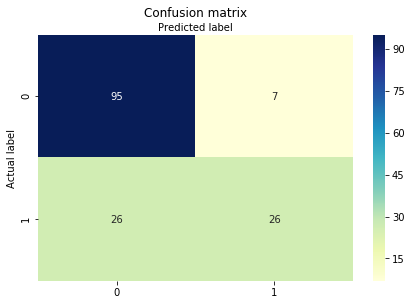

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### we can observe 102 times actual and predicted values are same while 52 times they are not. So the accuracy usinf confusion matrix will be

In [41]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test.round(), y_pred_class))

0.7857142857142857
0.7857142857142857


## Recall 
#### It is a measure of how many truly relevant results are returned. 

In [95]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test.round(), y_pred_class))

0.5
0.5


## Precision
#### When a positive value is predicted, how often is the prediction correct?
#### How "precise" is the classifier when predicting positive instances?

In [97]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test.round(), y_pred_class))

0.7878787878787878
0.7878787878787878


### predict diabetes if the predicted probability is greater than 0.3


In [98]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

## ROC Curves and Area Under the Curve (AUC)

In [100]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), y_pred_prob)

In [101]:
print(fpr[1:10])
print(tpr[1:10])
print(thresholds[1:10])

[0.         0.         0.00980392 0.00980392 0.01960784 0.01960784
 0.04901961 0.04901961 0.06862745]
[0.01923077 0.30769231 0.30769231 0.32692308 0.32692308 0.40384615
 0.40384615 0.42307692 0.42307692]
[0.95135432 0.65592996 0.6514311  0.64848994 0.64177172 0.59728397
 0.56574083 0.54941518 0.54334079]


#### Area under the curve

In [103]:
auc=metrics.roc_auc_score(y_test.round(), y_pred_prob)
print(auc)

0.8197586726998491


#### Plot ROC Curve

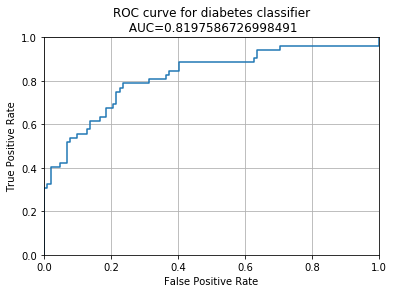

In [105]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(y_test.round(), y_pred_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

#### define a function that accepts a threshold and prints TP and FP rates

In [107]:
def evaluate_threshold(threshold):
    print('True Positive Rate:', tpr[thresholds > threshold][-1])
    print('False Positive Rate:', fpr[thresholds > threshold][-1])
    y_pred_class = binarize([y_pred_prob], threshold)[0]
    print('Accuracy:', metrics.accuracy_score(y_test.round(), y_pred_class))

evaluate_threshold(0.35)
evaluate_threshold(0.5)

True Positive Rate: 0.6730769230769231
False Positive Rate: 0.18627450980392157
Accuracy: 0.7597402597402597
True Positive Rate: 0.4230769230769231
False Positive Rate: 0.06862745098039216
Accuracy: 0.7857142857142857


## AUC
AUC is the percentage of the ROC plot that is underneath the curve:

In [109]:
print(metrics.roc_auc_score(y_test.round(), y_pred_prob))

0.8197586726998491


## Lasso Regression

In [111]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

cv_scores = cross_val_score(clf, X, y.round(), cv=10, scoring='roc_auc')
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[0.73971631 0.86479592 0.79583333 0.7822695  0.80995475 0.85131195
 0.76870748 0.92374214 0.83675144 0.82886905]
0.8201951876367488
0.05029249609222649


#### try lambda=0.0001 through lambda=2 and record testing accuracy

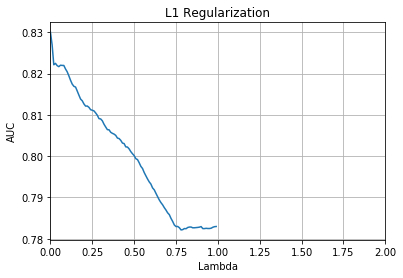

In [113]:
import numpy as np
lambda_range = np.arange(0.00001, 1, 0.01)
scores = []
for lam in lambda_range:
    logreg_lasso = Lasso(alpha=lam)
    scores.append(cross_val_score(logreg_lasso, X, y.round(), cv=5, scoring='roc_auc').mean())

import matplotlib.pyplot as plt

plt.plot(lambda_range, scores)
plt.xlim([0.0, 2])
#plt.ylim([0.0, 1.0])
plt.title('L1 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

## Ridge Regression

In [115]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=0.1)

cv_scores = cross_val_score(clf, X, y.round(), cv=10, scoring='roc_auc')
print(cv_scores.mean())
print(cv_scores.std())

0.8298122752059405
0.03890521029729631


#### try lambda=0.0001 through lambda=2 and record testing accuracy

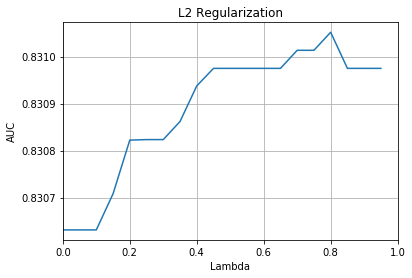

In [116]:
import numpy as np
lambda_range = np.arange(0.00001, 1, 0.05)
scores = []
for lam in lambda_range:
    logreg_ridge = RidgeClassifier(alpha=lam)
    scores.append(cross_val_score(logreg_ridge, X, y.round(), cv=5, scoring='roc_auc').mean())

import matplotlib.pyplot as plt

plt.plot(lambda_range, scores)
plt.xlim([0.0, 1])
#plt.ylim([0.0, 1.0])
plt.title('L2 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

## Maximum accuracy achieved is 83.83%